<a href="https://colab.research.google.com/github/Raghavarya2002/face-detection/blob/master/face_detection_using_mtcnnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 49.2 MB/s eta 0:00:00


In [2]:
from mtcnn.mtcnn import MTCNN
import cv2

In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.jpg to test.jpg


In [24]:
image = cv2.imread('test.jpg')

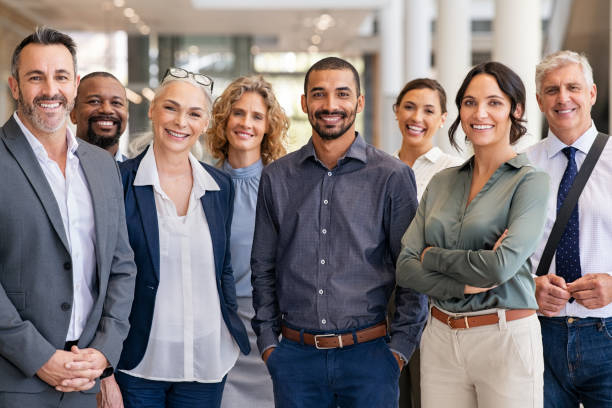

In [25]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [26]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
    x, y, width, height = face['box']
    cv2.rectangle(image, (x, y), (x+width, y+height), (0,155,255), 2)

1/1 [==============================] - 0s 107ms/step


In [27]:
def create_bbox(image):
  faces = detector.detect_faces(image)
  bounding_box = faces[0]['box']
  keypoints = faces[0]['keypoints']

  cv2.rectangle(image,
              (bounding_box[0], bounding_box[1]),
              (bounding_box[0]+bounding_box[2], bounding_box[1] + bounding_box[3]),
              (0,155,255),
              2)

  cv2.circle(image,(keypoints['left_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['right_eye']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['nose']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_left']), 2, (0,155,255), 2)
  cv2.circle(image,(keypoints['mouth_right']), 2, (0,155,255), 2)

  return image

In [28]:
marked_image = create_bbox(image)

1/1 [==============================] - 0s 24ms/step


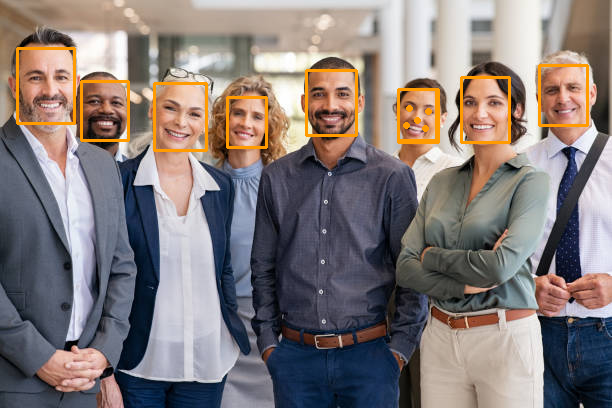

In [29]:
cv2_imshow(marked_image)